# We will take a colored picture and will use PCA to reduce its dimension and then reconstruct the image to visulize.

## Import all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

## Prepare the data

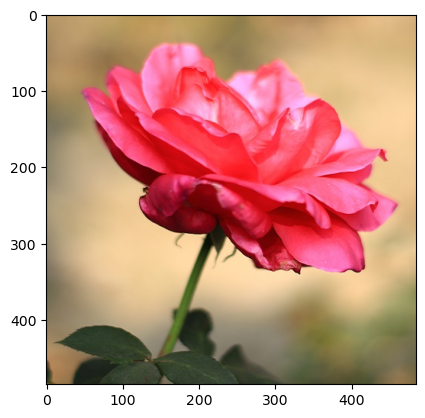

In [2]:
img = cv2.cvtColor(cv2.imread('rose.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
img.shape

(485, 485, 3)

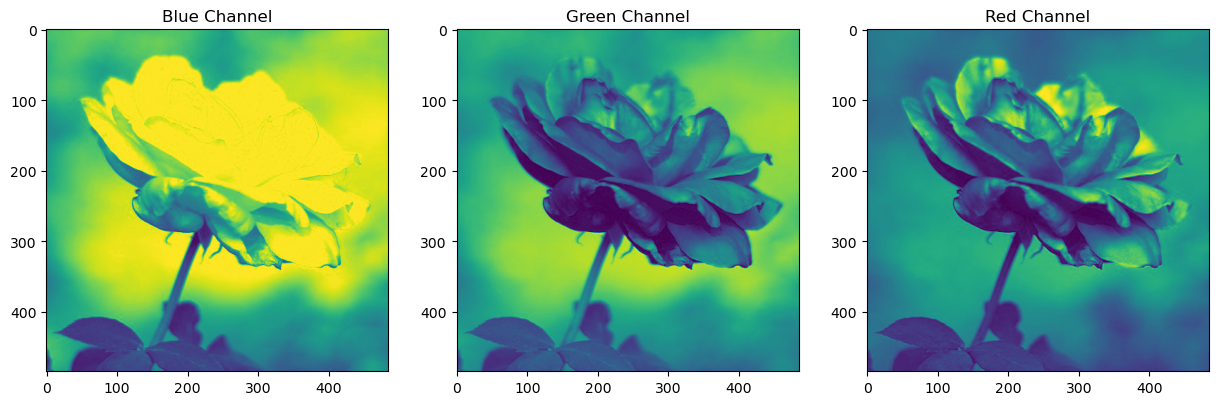

In [4]:
#Splitting into channels
blue,green,red = cv2.split(img)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

## Check the data of the blue channel

In [5]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,475,476,477,478,479,480,481,482,483,484
0,179,179,180,180,180,181,181,181,181,181,...,219,219,217,216,217,214,214,213,212,211
1,179,179,180,180,180,181,181,181,181,181,...,218,218,217,216,216,214,214,213,212,211
2,179,179,180,180,180,181,181,181,181,182,...,217,217,217,217,215,214,214,213,212,211
3,179,179,180,180,180,181,181,181,182,182,...,217,217,218,217,215,214,214,213,212,211
4,179,179,179,180,180,180,181,181,182,182,...,217,217,218,217,215,214,214,213,212,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,34,41,54,67,78,87,108,130,153,165,...,135,134,133,133,131,130,129,128,124,123
481,40,42,48,61,73,85,104,121,144,159,...,136,134,134,132,132,130,129,127,124,123
482,67,63,58,58,66,78,97,110,129,146,...,136,135,134,132,131,129,128,127,124,123
483,90,86,79,71,65,72,90,105,111,125,...,137,135,134,132,131,129,128,127,123,122


## Perform PCA

## Scale the data

In [6]:
df_blue = blue/255
df_green = green/255
df_red = red/255

## Fit the data in PCA

In [20]:
n=20
pca_b = PCA(n_components=n)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=n)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=n)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(485, 20)
(485, 20)
(485, 20)


### Lets plot a bar chart to check the explained variance ratio by each Eigen values

In [21]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9763979415754875
Green Channel: 0.964408256856155
Red Channel  : 0.9438872003338593


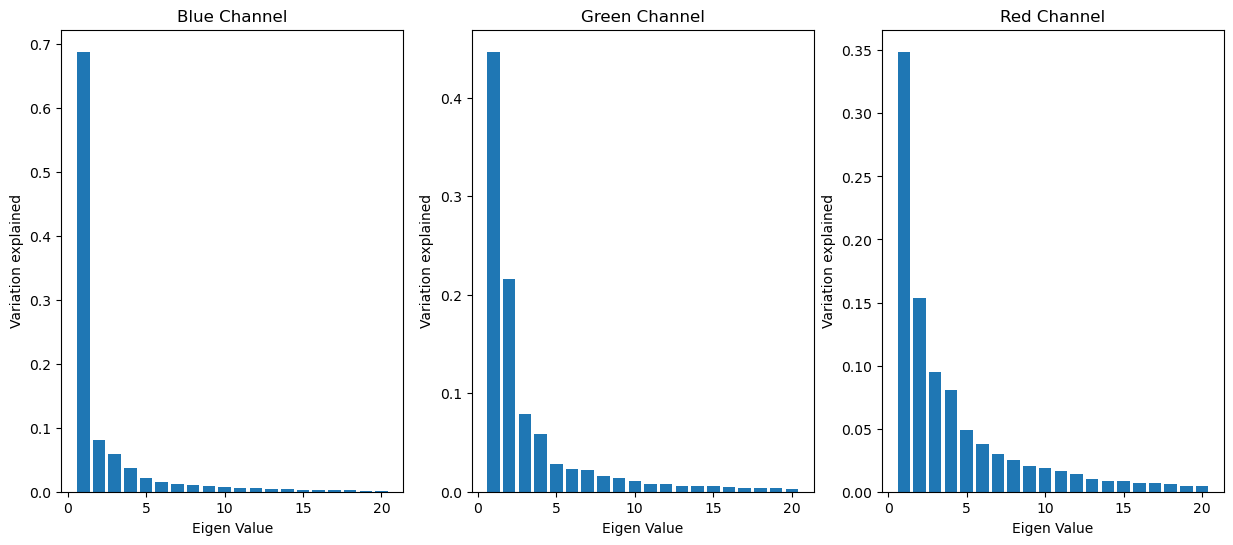

In [22]:
fig = plt.figure(figsize = (15, 6)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,n+1)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,n+1)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,n+1)),pca_r.explained_variance_ratio_)
plt.show()

### Reconstruct to validate and visualize

In [23]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(485, 485) (485, 485) (485, 485)


In [24]:
img_reduced= cv2.merge((b_arr, g_arr, r_arr))
print(img_reduced.shape)

(485, 485, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12275062492793726..1.1340528753466568].


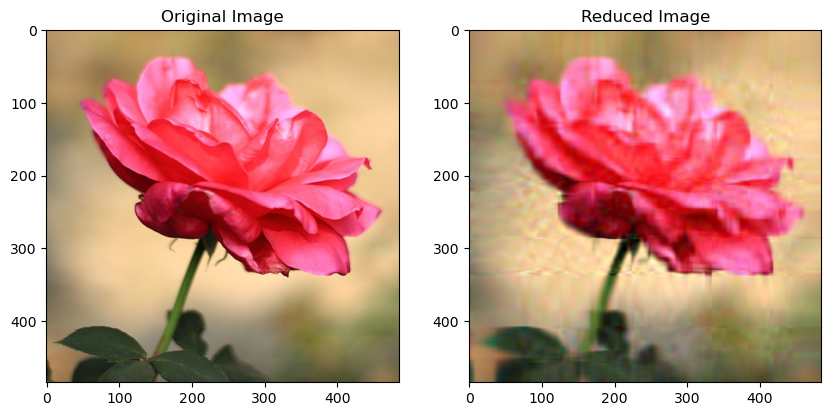

In [25]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()